In [1]:
import pandas as pd
import requests
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.plotly as py
import plotly as plty
import plotly.graph_objs as go

In [2]:
deals_df = pd.read_csv("PitchBook_Deals3.csv")
deals_df.head(1)

,Investor ID,Deal ID,Ticker,Investor Name,Portfolio Company ID,Deal Date,Deal Type 1,Deal Type 2,Portfolio Company Name,Description,...,Deal No.,Company Industry Sector,Company Industry Group,Company Industry Code,Company Verticals,All Industries,Company Business Status,Company Financing Status,# of Employees at Company,Deal Class
0,57961-99,88708-42T,FOX,21st Century Fox,179267-95,06-Jun-2017,Merger/Acquisition,NaN,Aftershock,Operator of mobile gaming studio intended to c...,...,2,Information Technology,Software,Entertainment Software,Mobile,Entertainment Software*,Generating Revenue,Formerly VC-Backed,80,Corporate


In [3]:
tickers = []
sectors = []

deals_df = deals_df.dropna(subset = ['Ticker'],how='any')

for deal in deals_df['Ticker']:
    tickers.append(deal)

for deal in deals_df['Company Industry Sector']:
    sectors.append(deal)


In [4]:
stockdata = []
stocks_list = []
stock_data_df = pd.DataFrame()
counter = 1

for ticker in tickers:
    url = f"https://api.iextrading.com/1.0/stock/{ticker}/batch?types=chart&range=2y"
    dealdate = ''
    sector = ''
    try:
        deals2_df = deals_df.loc[deals_df["Ticker"] == ticker, :]
        deals2_df = deals2_df.dropna(subset = ['Deal Date'],how='any')
        dealdate = deals2_df.iloc[0]['Deal Date']
        dealdate = datetime.strptime(dealdate, '%d-%b-%Y')
        sector = deals2_df.iloc[0]['Company Industry Sector']
    except:
        print(f"Error: No Deal Found ({counter})")
        counter += 1
        
    try:

        stocks = requests.get(url).json()

        stocks_list = [stock for stock in stocks["chart"]]

        for stock in stocks_list:
            date = stock['date']
            close = stock['close']

            date = datetime.strptime(date, '%Y-%m-%d')
            if not dealdate == '':
                startdate = dealdate - timedelta(days=7)
                enddate = dealdate + timedelta(days=7)
                if (date >= startdate and date <= enddate):
                    stockdata.append({"Ticker":ticker, "LatestPrice":close, "CloseTime":date, "DealDate":dealdate, "Sector":sector})

    except:
        print("Error")    



stock_data_df = pd.DataFrame(stockdata)

Error: No Deal Found (1)
Error: No Deal Found (2)
Error: No Deal Found (3)
Error: No Deal Found (4)
Error: No Deal Found (5)
Error: No Deal Found (6)
Error: No Deal Found (7)
Error: No Deal Found (8)
Error: No Deal Found (9)
Error: No Deal Found (10)
Error: No Deal Found (11)
Error: No Deal Found (12)
Error: No Deal Found (13)
Error: No Deal Found (14)
Error: No Deal Found (15)
Error: No Deal Found (16)
Error: No Deal Found (17)
Error: No Deal Found (18)
Error: No Deal Found (19)
Error: No Deal Found (20)
Error: No Deal Found (21)
Error: No Deal Found (22)
Error: No Deal Found (23)
Error: No Deal Found (24)
Error: No Deal Found (25)
Error: No Deal Found (26)
Error: No Deal Found (27)
Error: No Deal Found (28)
Error: No Deal Found (29)


In [5]:
tickerlist = stock_data_df['Ticker'].unique()
print(tickerlist)

sectorlist = stock_data_df['Sector'].unique()
print(sectorlist)

['FOX' 'ACN' 'ALL' 'AMZN' 'AXP' 'AMGN' 'BRK.A' 'BLK' 'BA' 'BKNG' 'BMY'
 'COF' 'CELG' 'KO' 'CL' 'CMCSA' 'DWDP' 'DUK' 'LLY' 'EXC' 'XOM' 'FDX' 'F'
 'GILD' 'INTC' 'JPM' 'LMT' 'MA' 'MCD' 'MRK' 'MSFT' 'MDLZ' 'NFLX' 'NKE'
 'PYPL' 'PFE' 'PG' 'QCOM' 'SLB' 'SO' 'SBUX' 'TGT' 'HD' 'UNP' 'UPS' 'UNH'
 'V' 'WMT']
['Information Technology' 'Consumer Products and Services (B2C)'
 'Healthcare' 'Financial Services' 'Business Products and Services (B2B)'
 'Energy']


In [6]:
sectorcolors = []
colorcounter = 1
for sector in sectorlist:
    sectorcolors.append({'Sector':sector, 'SectorColor':colorcounter})
    colorcounter += 1

In [7]:
stocks1 = []

for ticker in tickerlist:
    
    startamount = 0
    endamount = 0
    
    
    for index, stock in stock_data_df.iterrows():
        if (stock['Ticker'] == ticker):
            if (startamount == 0):
                startamount = stock['LatestPrice']
            endamount = stock['LatestPrice']
            sector = stock['Sector']

            for x in range(len(sectorcolors)):
                if (sector == sectorcolors[x]['Sector']):
                    if (sectorcolors[x]['SectorColor'] == 1):
                        sectorcolor = 'blue'
                    elif (sectorcolors[x]['SectorColor'] == 2):
                        sectorcolor = 'orange'
                    elif (sectorcolors[x]['SectorColor'] == 3):
                        sectorcolor = 'green'
                    elif (sectorcolors[x]['SectorColor'] == 4):
                        sectorcolor = 'red'
                    elif (sectorcolors[x]['SectorColor'] == 5):
                        sectorcolor = 'purple'
                    else:
                        sectorcolor = 'brown'
            

    pricediff = endamount - startamount
    percentchange = ((endamount - startamount) / startamount) * 100
    stocks1.append({'Ticker':ticker, 'StartPrice':startamount, 'EndPrice':endamount, 'PriceDiff':pricediff, 'PercentChange':percentchange, 'Sector':sector, 'SectorColor':sectorcolor})


In [8]:
stocks1_df = pd.DataFrame(stocks1)

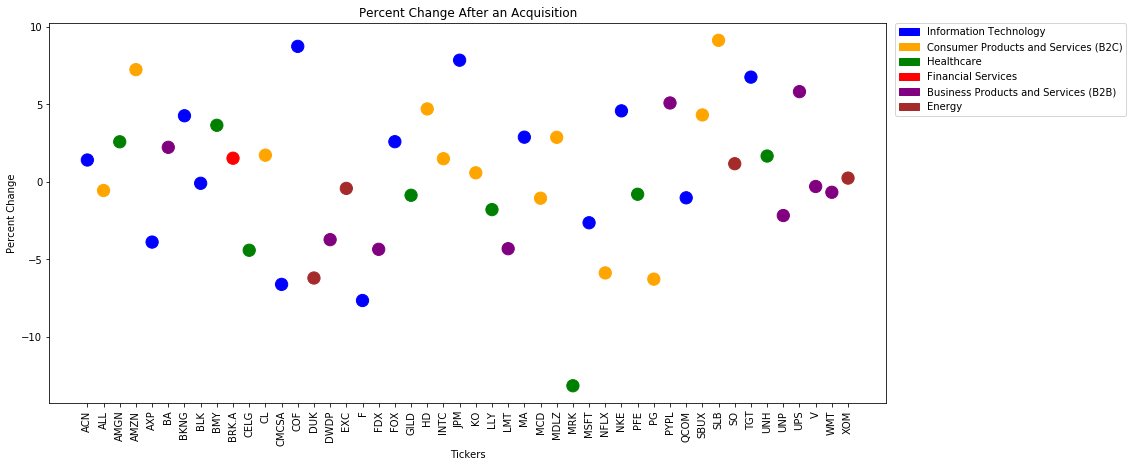

In [11]:
plt.figure(figsize=(15,7))
plt.xlabel('Tickers')
plt.ylabel('Percent Change')
plt.title("Percent Change After an Acquisition")
plt.scatter(stocks1_df['Ticker'],stocks1_df['PercentChange'],s=150, c=stocks1_df['SectorColor'], label=stocks1_df['Sector'])
plt.xticks(rotation=90)

color1 = mpatches.Patch(color='blue', label='Information Technology')
color2 = mpatches.Patch(color='orange', label='Consumer Products and Services (B2C)')
color3 = mpatches.Patch(color='green', label='Healthcare')
color4 = mpatches.Patch(color='red', label='Financial Services')
color5 = mpatches.Patch(color='purple', label='Business Products and Services (B2B)')
color6 = mpatches.Patch(color='brown', label='Energy')
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., handles=[color1, color2, color3, color4, color5, color6])
plt.savefig('PercentChange_Scatter.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)
plt.show()

In [10]:
df1 = stocks1_df.loc[stocks1_df['Sector'] == 'Information Technology']
df2 = stocks1_df.loc[stocks1_df['Sector'] == 'Consumer Products and Services (B2C)']
df3 = stocks1_df.loc[stocks1_df['Sector'] == 'Healthcare']
df4 = stocks1_df.loc[stocks1_df['Sector'] == 'Financial Services']
df5 = stocks1_df.loc[stocks1_df['Sector'] == 'Business Products and Services (B2B)']
df6 = stocks1_df.loc[stocks1_df['Sector'] == 'Energy']

trace1 = go.Scatter(x = df1['Ticker'], y = df1['PercentChange'], mode = 'markers', name = 'Information Technology', marker = dict(size = 15))
trace2 = go.Scatter(x = df2['Ticker'], y = df2['PercentChange'], mode = 'markers', name = 'Consumer Products and Services (B2C)', marker = dict(size = 15))
trace3 = go.Scatter(x = df3['Ticker'], y = df3['PercentChange'], mode = 'markers', name = 'Healthcare', marker = dict(size = 15))
trace4 = go.Scatter(x = df4['Ticker'], y = df4['PercentChange'], mode = 'markers', name = 'Financial Services', marker = dict(size = 15))
trace5 = go.Scatter(x = df5['Ticker'], y = df5['PercentChange'], mode = 'markers', name = 'Business Products and Services (B2B)', marker = dict(size = 15))
trace6 = go.Scatter(x = df6['Ticker'], y = df6['PercentChange'], mode = 'markers', name = 'Energy', marker = dict(size = 15))

data = [trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(title = 'Percent Change After an Acquisition', xaxis=dict(title='Ticker'), 
    yaxis=dict(title='Percent Change'))

fig = dict(data=data, layout=layout)

plty.tools.set_credentials_file(username='tjzientek', api_key='g7B0jcqPpaJ2sqt2RWzM')

py.iplot(fig, filename='PercentChange_Scatter')